##### Step 1: Import libraries

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
from sklearn.preprocessing import StandardScaler
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

##### Step 2: Defining a python function to plot the ROC curves.

In [150]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Step 3: Generate sample data.

In [151]:
def preprocessText(text):
    #here remove text
    cleantext=re.sub("\d+", "0", text)
    return cleantext
#utility function for reading files
def read_txt_files(files):
    text=[]
    topic=[]
    for i,file_path in enumerate(files):
        with open(file_path,'r' , encoding = 'utf-8') as infile:
            cleantext=preprocessText(infile.read())
            text.append(cleantext)
            file_topic=''.join(re.findall('[A-Za-z]', file_path.stem))
            topic.append(file_topic)
    return text, topic

In [152]:
import re, string, timeit
def len_text_no_punc(s):
    string_w = s.translate(str.maketrans('','',string.punctuation)) 
    return len(string_w)

#### Step 4: Split the data into train and test sub-datasets.

In [153]:
# load train data
train_real_news, train_real_news_topics = read_txt_files(sorted(Path('small_corpus\\Train\\Real\\').glob('*.txt')))
train_fake_news, train_fake_news_topics = read_txt_files(sorted(Path('small_corpus\\Train\\Fake\\').glob('*.txt')))
real = [1] * len(train_real_news_topics)
fake = [0] * len(train_fake_news_topics)
d = {'Text': train_real_news, 'Topic': train_real_news_topics,'Class':  real }
df1 = pd.DataFrame(data=d)
d = {'Text': train_fake_news, 'Topic': train_fake_news_topics,'Class': fake}
df2 = pd.DataFrame(data=d)
Train_data = pd.concat([df1,df2])
#load test data
real_news, real_news_topics = read_txt_files(sorted(Path('small_corpus\\Test\\Real\\').glob('*.txt')))
fake_news, fake_news_topics = read_txt_files(sorted(Path('small_corpus\\Test\\Fake\\').glob('*.txt')))
real = [1] * len(real_news_topics)
fake = [0] * len(fake_news_topics)
d = {'Text': real_news, 'Topic': real_news_topics,'Class': real}
df1 = pd.DataFrame(data=d)
d = {'Text': fake_news, 'Topic': fake_news_topics,'Class': fake}
df2 = pd.DataFrame(data=d)
Test_data = pd.concat([df1,df2])
df = pd.concat([Train_data,Test_data])
df['lengh_text'] = df['Text'].apply(len_text_no_punc)
df = df.sort_values(by=['lengh_text'], ascending=True)
df = df.reset_index(drop=True)
df = df[df['lengh_text']>=6] # only keep text with len more than 6 because n char
df.head(10)

,Text,Topic,Class,lengh_text
0,\n\nکراچی ( آن لائن ) حکومت نے عوام کو باہرکری...,bus,0,466
1,سٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر0ء...,bus,1,493
2,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر...,bus,0,500
3,اسلام آباد: عالمی مالیاتی کریڈٹ ریٹنگ ایجنسی ...,bus,1,1262
4,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,bus,1,1501
5,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,bus,0,1632
6,امریکا کی وزرات خزانہ نے مشکوک زرِ مبادلہ کی پ...,bus,1,1844
7,\nامریکا کی وزرات خزانہ نے مشکوک زرِ مبادلہ کی...,bus,0,1872
8,پاکستان کے وزیراعظم عمران خان سعودی عرب کے دار...,bus,1,2111
9,\n\n\n عمران خان نے وزارتِ عظمیٰ کا عہدہ سنبھا...,bus,0,2492


In [154]:
df = pd.concat([df, pd.get_dummies(df['Topic'])], axis=1)  
classe = df['Class']
df = df.drop(["Class","Topic"], axis=1)
df = pd.concat([df,classe], axis=1)
df.head(10)

,Text,lengh_text,bus,Class
0,\n\nکراچی ( آن لائن ) حکومت نے عوام کو باہرکری...,466,1,0
1,سٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر0ء...,493,1,1
2,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر...,500,1,0
3,اسلام آباد: عالمی مالیاتی کریڈٹ ریٹنگ ایجنسی ...,1262,1,1
4,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,1501,1,1
5,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,1632,1,0
6,امریکا کی وزرات خزانہ نے مشکوک زرِ مبادلہ کی پ...,1844,1,1
7,\nامریکا کی وزرات خزانہ نے مشکوک زرِ مبادلہ کی...,1872,1,0
8,پاکستان کے وزیراعظم عمران خان سعودی عرب کے دار...,2111,1,1
9,\n\n\n عمران خان نے وزارتِ عظمیٰ کا عہدہ سنبھا...,2492,1,0


In [155]:
x = df[['lengh_text']].values.astype(float)
min_max_scaler = StandardScaler()
df['lengh_text'] = min_max_scaler.fit_transform(x)
df.head(10)

,Text,lengh_text,bus,Class
0,\n\nکراچی ( آن لائن ) حکومت نے عوام کو باہرکری...,-1.100333,1,0
1,سٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر0ء...,-1.080103,1,1
2,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر...,-1.074859,1,0
3,اسلام آباد: عالمی مالیاتی کریڈٹ ریٹنگ ایجنسی ...,-0.503932,1,1
4,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,-0.324861,1,1
5,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,-0.226710,1,0
6,امریکا کی وزرات خزانہ نے مشکوک زرِ مبادلہ کی پ...,-0.067869,1,1
7,\nامریکا کی وزرات خزانہ نے مشکوک زرِ مبادلہ کی...,-0.046890,1,0
8,پاکستان کے وزیراعظم عمران خان سعودی عرب کے دار...,0.132180,1,1
9,\n\n\n عمران خان نے وزارتِ عظمیٰ کا عہدہ سنبھا...,0.417643,1,0


In [156]:
data=df.loc[:, df.columns == 'lengh_text']
data

,lengh_text
0,-1.100333
1,-1.080103
2,-1.074859
3,-0.503932
4,-0.324861
5,-0.226710
6,-0.067869
7,-0.046890
8,0.132180
9,0.417643


In [157]:
TrainX, TestX, labels_for_training, labels_for_testing = train_test_split(df.loc[:, df.columns == 'lengh_text'], df.loc[:, df.columns == 'Class'], test_size = 0.40, random_state = 0)
xTrain.head()

,Text,lengh_text,bus
9,تصویر کے کاپی رائٹ AFP\n\nپاکستانی وزیرِ خارجہ...,2.160839,1
1,\nسٹٹگارٹ (اُردو پوائنٹ اخبارتازہ ترین 0 دسمبر...,-1.213491,1
6,پاکستان کے وزیراعظم عمران خان سعودی عرب کے دار...,-0.025803,1
7,\n\n\n عمران خان نے وزارتِ عظمیٰ کا عہدہ سنبھا...,0.255084,1
3,واشنگٹن سافٹ ویئر بنانے والی دنیا کی سب سے بڑی...,-0.378939,1


In [158]:
labels_for_training.head()

,Class
8,1
1,1
7,0
9,0
3,1


### Step 5: Fit a model on the train data.

In [159]:
model = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=.1,  random_state=0)
model.fit(TrainX, labels_for_training)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=0)

#### Step 6: Predict probabilities for the test data.

In [160]:
probs = model.predict_proba(TestX)
probs

array([[0.62257449, 0.37742551],
       [0.66216383, 0.33783617],
       [0.62257449, 0.37742551],
       [0.66216383, 0.33783617],
       [0.35945266, 0.64054734]])

In [161]:
labels_for_testing

,Class
6,1
11,1
4,1
10,1
2,0


#### Step 7: Keep Probabilities of the positive class only.

In [176]:
probss =probs[:,1]
probss

array([0.37742551, 0.33783617, 0.37742551, 0.33783617, 0.64054734])

In [177]:
labels_for_testing

,Class
6,1
11,1
4,1
10,1
2,0


### Step 8: Compute the AUC Score

In [178]:
auc = roc_auc_score(labels_for_testing, probss)
print('AUC: %.2f' % auc)

AUC: 0.00


### Step 9: Get the ROC Curve.

In [179]:
fpr, tpr, thresholds = roc_curve(labels_for_testing, probss)

In [180]:
fpr, tpr, thresholds

(array([0., 1., 1.]),
 array([0., 0., 1.]),
 array([1.64054734, 0.64054734, 0.33783617]))

#### Step 10: Plot ROC Curve using our defined function

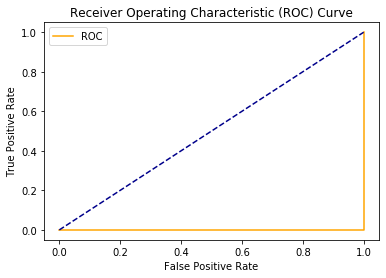

In [181]:
plot_roc_curve(fpr, tpr)